In [4]:
import pandas as pd
import mplfinance as mpf
import numpy as np

# Load OHLC data
ohlc = pd.read_csv("applyiedMacd-1.csv", parse_dates=["DateTime"])
ohlc.set_index("DateTime", inplace=True)

# Load trades
trades = pd.read_csv("bt.result.csv", parse_dates=["Entry Time"])


In [5]:
import pandas as pd
import mplfinance as mpf
import numpy as np

def get_entry_markers(ohlc, trades, nrows=None):
    """
    Prepare addplot for trade entry markers on a candlestick chart.

    Returns an `addplot` object that can be passed to mpf.plot.
    """
    # Limit rows if requested
    ohlc_plot = ohlc.iloc[:nrows] if nrows else ohlc.copy()

    # Create entry marker series aligned with OHLC index
    entry_series = pd.Series(np.nan, index=ohlc_plot.index)
    for _, row in trades.iterrows():
        t = row['Entry Time']
        if t in entry_series.index:
            entry_series.loc[t] = row['Entry Price']

    # Create addplot
    entry_markers = mpf.make_addplot(
        entry_series,
        type='scatter',
        markersize=100,
        marker='^',
        color='blue'
    )

    return entry_markers


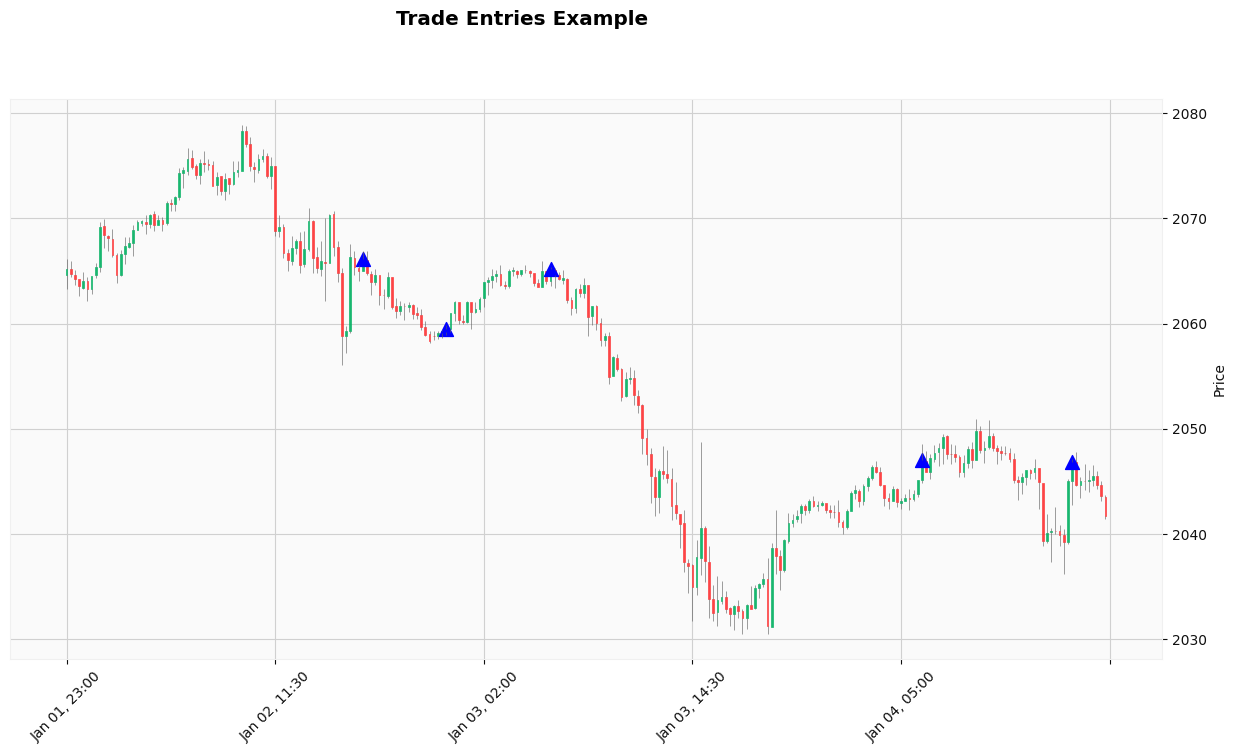

In [6]:
# Prepare addplot
entry_markers = get_entry_markers(ohlc, trades, nrows=250)

# Plot chart outside the function
mpf.plot(
    ohlc.iloc[:250],
    type='candle',
    style='yahoo',
    figsize=(16,8),
    title="Trade Entries Example",
    addplot=entry_markers
)
